In [80]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [81]:
data=pd.read_csv('C:/Users/Akash/Life Expectancy Data.csv')
data

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,HepatitisB,Measles,...,Polio,Total Expenditure,Diptheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [82]:
data2=data[data['Year']==2010]
data2

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,HepatitisB,Measles,...,Polio,Total Expenditure,Diptheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
21,Albania,2010,Developing,76.2,91.0,1,5.28,41.822757,99.0,10,...,99.0,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5
37,Algeria,2010,Developing,74.7,119.0,21,0.45,430.717586,95.0,103,...,95.0,5.12,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
53,Angola,2010,Developing,49.6,365.0,78,7.80,191.653741,77.0,1190,...,81.0,3.39,77.0,2.5,3529.534820,23369131.0,9.1,9.0,0.488,9.0
69,Antigua and Barbuda,2010,Developing,75.6,138.0,0,7.84,1983.956937,98.0,0,...,99.0,5.63,98.0,0.1,12126.876140,NaN,3.3,3.3,0.783,14.1
85,Argentina,2010,Developing,75.5,121.0,10,8.15,187.610955,94.0,17,...,95.0,6.55,94.0,0.1,1276.265000,41223889.0,1.0,0.9,0.802,16.8
101,Armenia,2010,Developing,73.5,132.0,1,4.23,224.321201,94.0,2,...,96.0,4.56,94.0,0.1,3218.381655,2877311.0,2.0,2.1,0.720,12.3
117,Australia,2010,Developed,81.9,64.0,1,10.52,8875.786493,92.0,70,...,92.0,9.20,92.0,0.1,51874.848000,223175.0,0.7,0.6,0.927,19.5
133,Austria,2010,Developed,84.0,75.0,0,12.10,7423.228774,86.0,52,...,86.0,11.17,86.0,0.1,46657.629000,836344.0,1.7,1.9,0.872,15.4
149,Azerbaijan,2010,Developing,71.1,13.0,5,1.98,246.568601,8.0,0,...,85.0,5.33,81.0,0.1,5842.857840,954332.0,2.8,2.9,0.737,11.7


In [83]:
data2.to_csv("C:/Users/Akash/Life Expectancy 2010.csv")

In [84]:
LE1=pd.read_csv('C:/Users/Akash/Life Exp 2010.csv')
LE1

,Unnamed: 0,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,HepatitisB,...,Polio,Total Expenditure,Diptheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
1,21,Albania,2010,Developing,76.2,91.0,1,5.28,41.822757,99.0,...,99.0,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5
2,37,Algeria,2010,Developing,74.7,119.0,21,0.45,430.717586,95.0,...,95.0,5.12,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
3,53,Angola,2010,Developing,49.6,365.0,78,7.80,191.653741,77.0,...,81.0,3.39,77.0,2.5,3529.534820,23369131.0,9.1,9.0,0.488,9.0
4,69,Antigua and Barbuda,2010,Developing,75.6,138.0,0,7.84,1983.956937,98.0,...,99.0,5.63,98.0,0.1,12126.876140,NaN,3.3,3.3,0.783,14.1
5,85,Argentina,2010,Developing,75.5,121.0,10,8.15,187.610955,94.0,...,95.0,6.55,94.0,0.1,1276.265000,41223889.0,1.0,0.9,0.802,16.8
6,101,Armenia,2010,Developing,73.5,132.0,1,4.23,224.321201,94.0,...,96.0,4.56,94.0,0.1,3218.381655,2877311.0,2.0,2.1,0.720,12.3
7,117,Australia,2010,Developed,81.9,64.0,1,10.52,8875.786493,92.0,...,92.0,9.20,92.0,0.1,51874.848000,223175.0,0.7,0.6,0.927,19.5
8,133,Austria,2010,Developed,84.0,75.0,0,12.10,7423.228774,86.0,...,86.0,11.17,86.0,0.1,46657.629000,836344.0,1.7,1.9,0.872,15.4
9,149,Azerbaijan,2010,Developing,71.1,13.0,5,1.98,246.568601,8.0,...,85.0,5.33,81.0,0.1,5842.857840,954332.0,2.8,2.9,0.737,11.7


In [85]:
LE2=LE1.drop(['Unnamed: 0'], axis=1)
LE2

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,HepatitisB,Measles,...,Polio,Total Expenditure,Diptheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
1,Albania,2010,Developing,76.2,91.0,1,5.28,41.822757,99.0,10,...,99.0,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5
2,Algeria,2010,Developing,74.7,119.0,21,0.45,430.717586,95.0,103,...,95.0,5.12,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
3,Angola,2010,Developing,49.6,365.0,78,7.80,191.653741,77.0,1190,...,81.0,3.39,77.0,2.5,3529.534820,23369131.0,9.1,9.0,0.488,9.0
4,Antigua and Barbuda,2010,Developing,75.6,138.0,0,7.84,1983.956937,98.0,0,...,99.0,5.63,98.0,0.1,12126.876140,NaN,3.3,3.3,0.783,14.1
5,Argentina,2010,Developing,75.5,121.0,10,8.15,187.610955,94.0,17,...,95.0,6.55,94.0,0.1,1276.265000,41223889.0,1.0,0.9,0.802,16.8
6,Armenia,2010,Developing,73.5,132.0,1,4.23,224.321201,94.0,2,...,96.0,4.56,94.0,0.1,3218.381655,2877311.0,2.0,2.1,0.720,12.3
7,Australia,2010,Developed,81.9,64.0,1,10.52,8875.786493,92.0,70,...,92.0,9.20,92.0,0.1,51874.848000,223175.0,0.7,0.6,0.927,19.5
8,Austria,2010,Developed,84.0,75.0,0,12.10,7423.228774,86.0,52,...,86.0,11.17,86.0,0.1,46657.629000,836344.0,1.7,1.9,0.872,15.4
9,Azerbaijan,2010,Developing,71.1,13.0,5,1.98,246.568601,8.0,0,...,85.0,5.33,81.0,0.1,5842.857840,954332.0,2.8,2.9,0.737,11.7


In [86]:
LE2.isnull().sum()

Country                             0
Year                                0
Status                              0
Life Expectancy                     0
Adult Mortality                     0
Infant Deaths                       0
Alcohol                             1
Percentage Expenditure              0
HepatitisB                         15
Measles                             0
BMI                                 2
Under-five Deaths                   0
Polio                               1
Total Expenditure                   3
Diptheria                           1
HIV/AIDS                            0
GDP                                27
Population                         40
Thinness 1-19 years                 2
Thinness 5-9 years                  2
Income Composition of Resources    10
Schooling                          10
dtype: int64

In [87]:
LE2.describe()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,HepatitisB,Measles,BMI,Under-five Deaths,Polio,Total Expenditure,Diptheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
count,183.0,183.000000,183.000000,183.000000,182.000000,183.000000,168.000000,183.000000,181.000000,183.000000,182.000000,180.000000,182.000000,183.000000,156.000000,1.430000e+02,181.000000,181.000000,173.000000,173.000000
mean,2010.0,70.048634,161.863388,27.928962,4.943626,768.221388,80.732143,1878.721311,38.513812,38.546448,83.890110,6.151222,82.741758,1.273770,7464.487887,1.181332e+07,4.659116,4.639779,0.655197,12.446821
std,0.0,9.302959,120.435555,104.025305,3.889271,1867.395778,25.628968,9806.616023,21.043111,141.622493,22.463205,2.735260,24.669401,2.984331,13959.522835,3.429824e+07,4.204956,4.263966,0.185699,3.045804
min,2010.0,36.300000,2.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.200000,0.000000,7.000000,0.920000,6.000000,0.100000,8.376432,1.230000e+02,0.100000,0.100000,0.000000,0.000000
25%,2010.0,63.450000,73.500000,0.000000,1.372500,20.521382,76.000000,0.000000,19.800000,0.000000,81.000000,4.347500,81.000000,0.100000,700.796595,1.709840e+05,1.600000,1.500000,0.523000,10.500000
50%,2010.0,72.800000,142.000000,3.000000,4.210000,129.226075,92.000000,17.000000,44.200000,3.000000,94.000000,5.840000,93.500000,0.100000,2183.358036,9.495830e+05,3.300000,3.300000,0.700000,12.700000
75%,2010.0,75.800000,221.500000,21.000000,7.927500,585.205429,97.000000,353.000000,57.500000,25.500000,97.000000,7.915000,97.000000,0.500000,5841.772875,5.642703e+06,7.100000,7.000000,0.788000,14.400000
max,2010.0,89.000000,682.000000,1200.000000,14.970000,15268.064450,99.000000,118712.000000,75.200000,1600.000000,99.000000,17.200000,99.000000,21.600000,87646.753460,2.425241e+08,27.000000,27.800000,0.936000,20.300000


In [88]:
status = pd.get_dummies(LE2.Status)
Life = pd.concat([LE2, status], axis = 1)
Life = Life.drop(['Status'], axis=1)
Life

,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,HepatitisB,Measles,BMI,...,Diptheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
0,Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
1,Albania,2010,76.2,91.0,1,5.28,41.822757,99.0,10,54.3,...,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5,0,1
2,Algeria,2010,74.7,119.0,21,0.45,430.717586,95.0,103,53.9,...,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6,0,1
3,Angola,2010,49.6,365.0,78,7.80,191.653741,77.0,1190,2.4,...,77.0,2.5,3529.534820,23369131.0,9.1,9.0,0.488,9.0,0,1
4,Antigua and Barbuda,2010,75.6,138.0,0,7.84,1983.956937,98.0,0,44.4,...,98.0,0.1,12126.876140,NaN,3.3,3.3,0.783,14.1,0,1
5,Argentina,2010,75.5,121.0,10,8.15,187.610955,94.0,17,59.8,...,94.0,0.1,1276.265000,41223889.0,1.0,0.9,0.802,16.8,0,1
6,Armenia,2010,73.5,132.0,1,4.23,224.321201,94.0,2,51.2,...,94.0,0.1,3218.381655,2877311.0,2.0,2.1,0.720,12.3,0,1
7,Australia,2010,81.9,64.0,1,10.52,8875.786493,92.0,70,63.9,...,92.0,0.1,51874.848000,223175.0,0.7,0.6,0.927,19.5,1,0
8,Austria,2010,84.0,75.0,0,12.10,7423.228774,86.0,52,55.2,...,86.0,0.1,46657.629000,836344.0,1.7,1.9,0.872,15.4,1,0
9,Azerbaijan,2010,71.1,13.0,5,1.98,246.568601,8.0,0,48.0,...,81.0,0.1,5842.857840,954332.0,2.8,2.9,0.737,11.7,0,1


In [89]:
life_ex=Life.drop(columns=['Year'],axis=1)
life_ex

,Country,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,HepatitisB,Measles,BMI,Under-five Deaths,...,Diptheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
0,Afghanistan,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
1,Albania,76.2,91.0,1,5.28,41.822757,99.0,10,54.3,1,...,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5,0,1
2,Algeria,74.7,119.0,21,0.45,430.717586,95.0,103,53.9,24,...,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6,0,1
3,Angola,49.6,365.0,78,7.80,191.653741,77.0,1190,2.4,121,...,77.0,2.5,3529.534820,23369131.0,9.1,9.0,0.488,9.0,0,1
4,Antigua and Barbuda,75.6,138.0,0,7.84,1983.956937,98.0,0,44.4,0,...,98.0,0.1,12126.876140,NaN,3.3,3.3,0.783,14.1,0,1
5,Argentina,75.5,121.0,10,8.15,187.610955,94.0,17,59.8,11,...,94.0,0.1,1276.265000,41223889.0,1.0,0.9,0.802,16.8,0,1
6,Armenia,73.5,132.0,1,4.23,224.321201,94.0,2,51.2,1,...,94.0,0.1,3218.381655,2877311.0,2.0,2.1,0.720,12.3,0,1
7,Australia,81.9,64.0,1,10.52,8875.786493,92.0,70,63.9,1,...,92.0,0.1,51874.848000,223175.0,0.7,0.6,0.927,19.5,1,0
8,Austria,84.0,75.0,0,12.10,7423.228774,86.0,52,55.2,0,...,86.0,0.1,46657.629000,836344.0,1.7,1.9,0.872,15.4,1,0
9,Azerbaijan,71.1,13.0,5,1.98,246.568601,8.0,0,48.0,6,...,81.0,0.1,5842.857840,954332.0,2.8,2.9,0.737,11.7,0,1


In [90]:
corr=life_ex.corr()
corr

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,HepatitisB,Measles,BMI,Under-five Deaths,Polio,...,Diptheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
Life Expectancy,1.000000,-0.780982,-0.205952,0.398599,0.405612,0.263615,-0.176887,0.525893,-0.231397,0.389760,...,0.402022,-0.588800,0.448413,-0.008577,-0.467986,-0.454757,0.781424,0.781414,0.501073,-0.501073
Adult Mortality,-0.780982,1.000000,0.144330,-0.186846,-0.251989,-0.301823,0.232017,-0.396648,0.166775,-0.304120,...,-0.366209,0.608974,-0.287358,0.052595,0.343390,0.336460,-0.580578,-0.564931,-0.334731,0.334731
Infant Deaths,-0.205952,0.144330,1.000000,-0.113645,-0.095185,-0.211539,0.294779,-0.214227,0.997005,-0.121135,...,-0.137183,0.049595,-0.108191,0.208789,0.443947,0.438160,-0.159611,-0.207786,-0.117972,0.117972
Alcohol,0.398599,-0.186846,-0.113645,1.000000,0.312725,0.132393,-0.071576,0.277791,-0.108571,0.212122,...,0.217877,-0.060273,0.340303,0.041434,-0.439993,-0.419327,0.498999,0.597037,0.579996,-0.579996
Percentage Expenditure,0.405612,-0.251989,-0.095185,0.312725,1.000000,-0.022858,-0.060511,0.306358,-0.097151,0.133744,...,0.134057,-0.121834,0.892896,-0.030589,-0.279149,-0.273815,0.423948,0.479048,0.482396,-0.482396
HepatitisB,0.263615,-0.301823,-0.211539,0.132393,-0.022858,1.000000,-0.012601,0.161963,-0.225175,0.391055,...,0.653691,-0.181570,0.010070,0.046509,-0.088187,-0.079763,0.220376,0.264509,0.107647,-0.107647
Measles,-0.176887,0.232017,0.294779,-0.071576,-0.060511,-0.012601,1.000000,-0.136854,0.288278,-0.027715,...,0.021214,0.335901,-0.080731,0.069014,0.140516,0.142112,-0.112994,-0.088437,-0.050986,0.050986
BMI,0.525893,-0.396648,-0.214227,0.277791,0.306358,0.161963,-0.136854,1.000000,-0.222437,0.264627,...,0.257867,-0.284072,0.349999,-0.016562,-0.509345,-0.500856,0.530699,0.536104,0.360973,-0.360973
Under-five Deaths,-0.231397,0.166775,0.997005,-0.108571,-0.097151,-0.225175,0.288278,-0.222437,1.000000,-0.137820,...,-0.154038,0.065779,-0.111006,0.218001,0.449819,0.441116,-0.174605,-0.221784,-0.120140,0.120140
Polio,0.389760,-0.304120,-0.121135,0.212122,0.133744,0.391055,-0.027715,0.264627,-0.137820,1.000000,...,0.613427,-0.155778,0.179061,0.026908,-0.229969,-0.217246,0.330323,0.383726,0.170434,-0.170434


In [91]:
life_ex.isnull()

,Country,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,HepatitisB,Measles,BMI,Under-five Deaths,...,Diptheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
life_ex.isnull().sum()

Country                             0
Life Expectancy                     0
Adult Mortality                     0
Infant Deaths                       0
Alcohol                             1
Percentage Expenditure              0
HepatitisB                         15
Measles                             0
BMI                                 2
Under-five Deaths                   0
Polio                               1
Total Expenditure                   3
Diptheria                           1
HIV/AIDS                            0
GDP                                27
Population                         40
Thinness 1-19 years                 2
Thinness 5-9 years                  2
Income Composition of Resources    10
Schooling                          10
Developed                           0
Developing                          0
dtype: int64

In [93]:
life_ex.fillna(value=life_ex.mean(),inplace=True)

In [94]:
life_ex.isnull().sum()

Country                            0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under-five Deaths                  0
Polio                              0
Total Expenditure                  0
Diptheria                          0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income Composition of Resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [95]:
import statsmodels.api as sm
x_sm=sm.add_constant(life_ex[['Adult Mortality','Infant Deaths','Alcohol','Percentage Expenditure','HepatitisB','Measles','BMI','Under-five Deaths','Polio','Total Expenditure','Diptheria','HIV/AIDS','GDP', 'Population','Thinness 1-19 years','Thinness 5-9 years','Income Composition of Resources','Schooling','Developed','Developing']])
model=sm.OLS(life_ex['Life Expectancy'],x_sm)
result=model.fit()
result.summary()

C:\Users\Akash\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     41.44
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.92e-52
Time:                        12:01:55   Log-Likelihood:                -505.99
No. Observations:                 183   AIC:                             1052.
Df Residuals:                     163   BIC:                             1116.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              39.1026      1.932     20.241      0.000      35.288      42.917
Adult Mortality                    -0.0266      0.004     -6.870      0.000      -0.034      -0.019
Infant Deaths                       0.1234      0.042      2.925      0.004       0.040       0.207
Alcohol                             0.1221      0.115      1.065      0.289      -0.104       0.348
Percentage Expenditure              0.0002      0.000      0.576      0.565      -0.000       0.001
HepatitisB                         -0.0305      0.017     -1.841      0.067      -0.063       0.002
Measles                          3.872e-05   3.54e-05      1.092      0.276   -3.13e-05       0.000
BMI                                 0.0329      0.018      1.799      0.074      -0.003       0.069
Under-five Deaths                  -0.0959      0.031     -3.073      0.002      -0.157      -0.034
Polio                               0.0220      0.018      1.257      0.210      -0.013       0.057
Total Expenditure                   0.1452      0.129      1.129      0.261      -0.109       0.399
Diptheria                           0.0200      0.019      1.035      0.302      -0.018       0.058
HIV/AIDS                           -0.6320      0.136     -4.630      0.000      -0.902      -0.362
GDP                             -7.492e-06   5.09e-05     -0.147      0.883      -0.000     9.3e-05
Population                       6.914e-09   1.09e-08      0.634      0.527   -1.46e-08    2.84e-08
Thinness 1-19 years                 0.2880      0.338      0.852      0.395      -0.379       0.955
Thinness 5-9 years                 -0.2248      0.322     -0.698      0.486      -0.861       0.411
Income Composition of Resources     9.2768      3.051      3.040      0.003       3.252      15.302
Schooling                           0.5552      0.201      2.756      0.007       0.157       0.953
Developed                          20.4647      1.239     16.516      0.000      18.018      22.911
Developing                         18.6379      0.979     19.038      0.000      16.705      20.571
==============================================================================
Omnibus:                       14.280   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.318
Skew:                          -0.440   Prob(JB):                     1.42e-05
Kurtosis:                       4.467   Cond. No.                     5.39e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.62e-31. This might indicate that there are
strong multicollinearity probl

# Preprocessing 2010 data

In [96]:
li=life_ex.drop(columns=['Country'],axis=1)
li

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,HepatitisB,Measles,BMI,Under-five Deaths,Polio,...,Diptheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Developed,Developing
0,58.8,279.0,74,0.01,79.679367,66.000000,1989,16.700000,102,66.0,...,66.0,0.1,553.328940,2.883167e+06,18.400000,18.400000,0.448000,9.200000,0,1
1,76.2,91.0,1,5.28,41.822757,99.000000,10,54.300000,1,99.0,...,99.0,0.1,494.358832,2.913210e+05,1.400000,1.500000,0.725000,12.500000,0,1
2,74.7,119.0,21,0.45,430.717586,95.000000,103,53.900000,24,95.0,...,95.0,0.1,4463.394675,3.611764e+07,5.900000,5.800000,0.714000,13.600000,0,1
3,49.6,365.0,78,7.80,191.653741,77.000000,1190,2.400000,121,81.0,...,77.0,2.5,3529.534820,2.336913e+07,9.100000,9.000000,0.488000,9.000000,0,1
4,75.6,138.0,0,7.84,1983.956937,98.000000,0,44.400000,0,99.0,...,98.0,0.1,12126.876140,1.181332e+07,3.300000,3.300000,0.783000,14.100000,0,1
5,75.5,121.0,10,8.15,187.610955,94.000000,17,59.800000,11,95.0,...,94.0,0.1,1276.265000,4.122389e+07,1.000000,0.900000,0.802000,16.800000,0,1
6,73.5,132.0,1,4.23,224.321201,94.000000,2,51.200000,1,96.0,...,94.0,0.1,3218.381655,2.877311e+06,2.000000,2.100000,0.720000,12.300000,0,1
7,81.9,64.0,1,10.52,8875.786493,92.000000,70,63.900000,1,92.0,...,92.0,0.1,51874.848000,2.231750e+05,0.700000,0.600000,0.927000,19.500000,1,0
8,84.0,75.0,0,12.10,7423.228774,86.000000,52,55.200000,0,86.0,...,86.0,0.1,46657.629000,8.363440e+05,1.700000,1.900000,0.872000,15.400000,1,0
9,71.1,13.0,5,1.98,246.568601,8.000000,0,48.000000,6,85.0,...,81.0,0.1,5842.857840,9.543320e+05,2.800000,2.900000,0.737000,11.700000,0,1


In [97]:
interaction = PolynomialFeatures(degree=3, interaction_only=True)
x_interaction=interaction.fit_transform(li)
LR_interaction=LinearRegression().fit(x_interaction,li['Life Expectancy'])

In [98]:
x_inter_sm=sm.add_constant(x_interaction)
model=sm.OLS(li['Life Expectancy'],x_inter_sm)
result=model.fit()
result.summary()

C:\Users\Akash\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Akash\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\Akash\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Akash\Anaconda3\lib\site-packages\statsmodels\base\model.py:1181: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
C:\Users\Akash\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Akash\Anaconda3\lib\site-packages\scipy\stats\_dis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 29 Nov 2019   Prob (F-statistic):                nan
Time:                        12:01:56   Log-Likelihood:                 2579.3
No. Observations:                 183   AIC:                            -4793.
Df Residuals:                       0   BIC:                            -4205.
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.937e-11        inf          0        nan         nan         nan
x1          2.092e-09        inf          0        nan         nan         nan
x2          1.557e-09        inf          0        nan         nan         nan
x3          2.265e-11        inf          0        nan         nan         nan
x4          1.807e-10        inf          0        nan         nan         nan
x5          1.554e-10        inf          0        nan         nan         nan
x6          2.442e-09        inf          0        nan         nan         nan
x7          1.812e-10        inf          0        nan         nan         nan
x8          8.651e-10        inf          0        nan         nan         nan
x9          4.262e-11        inf          0        nan         nan         nan
x10         2.412e-09        inf          0        nan         nan         nan
x11         1.093e-10        inf          0        nan         nan         nan
x12         2.423e-09        inf          0        nan         nan         nan
x13         4.821e-12        inf          0        nan         nan         nan
x14         2.136e-09        inf          0        nan         nan         nan
x15         3.866e-08        inf          0        nan         nan         nan
x16         1.978e-10        inf          0        nan         nan         nan
x17         2.074e-10        inf          0        nan         nan         nan
x18         1.953e-11        inf          0        nan         nan         nan
x19          3.56e-10        inf          0        nan         nan         nan
x20         4.748e-12        inf          0        nan         nan         nan
x21         2.462e-11        inf          0        nan         nan         nan
x22         9.687e-08        inf          0        nan         nan         nan
x23         1.098e-09        inf          0        nan         nan         nan
x24         1.327e-08        inf          0        nan         nan         nan
x25         1.001e-08        inf          0        nan         nan         nan
x26         1.766e-07        inf          0        nan         nan         nan
x27          1.18e-08        inf          0        nan         nan         nan
x28         6.527e-08        inf          0        nan         nan         nan
x29         2.286e-09        inf          0        nan         nan         nan
x30         1.747e-07        inf          0        nan         nan         nan
x31         8.069e-09        inf          0        nan         nan         nan
x32         1.754e-07        inf          0        nan         nan         nan
x33         3.025e-10        inf          0        nan         nan         nan
x34         1.248e-07        inf          0        nan         nan         nan
x35         2.534e-06        inf          0        nan         nan         nan
x3

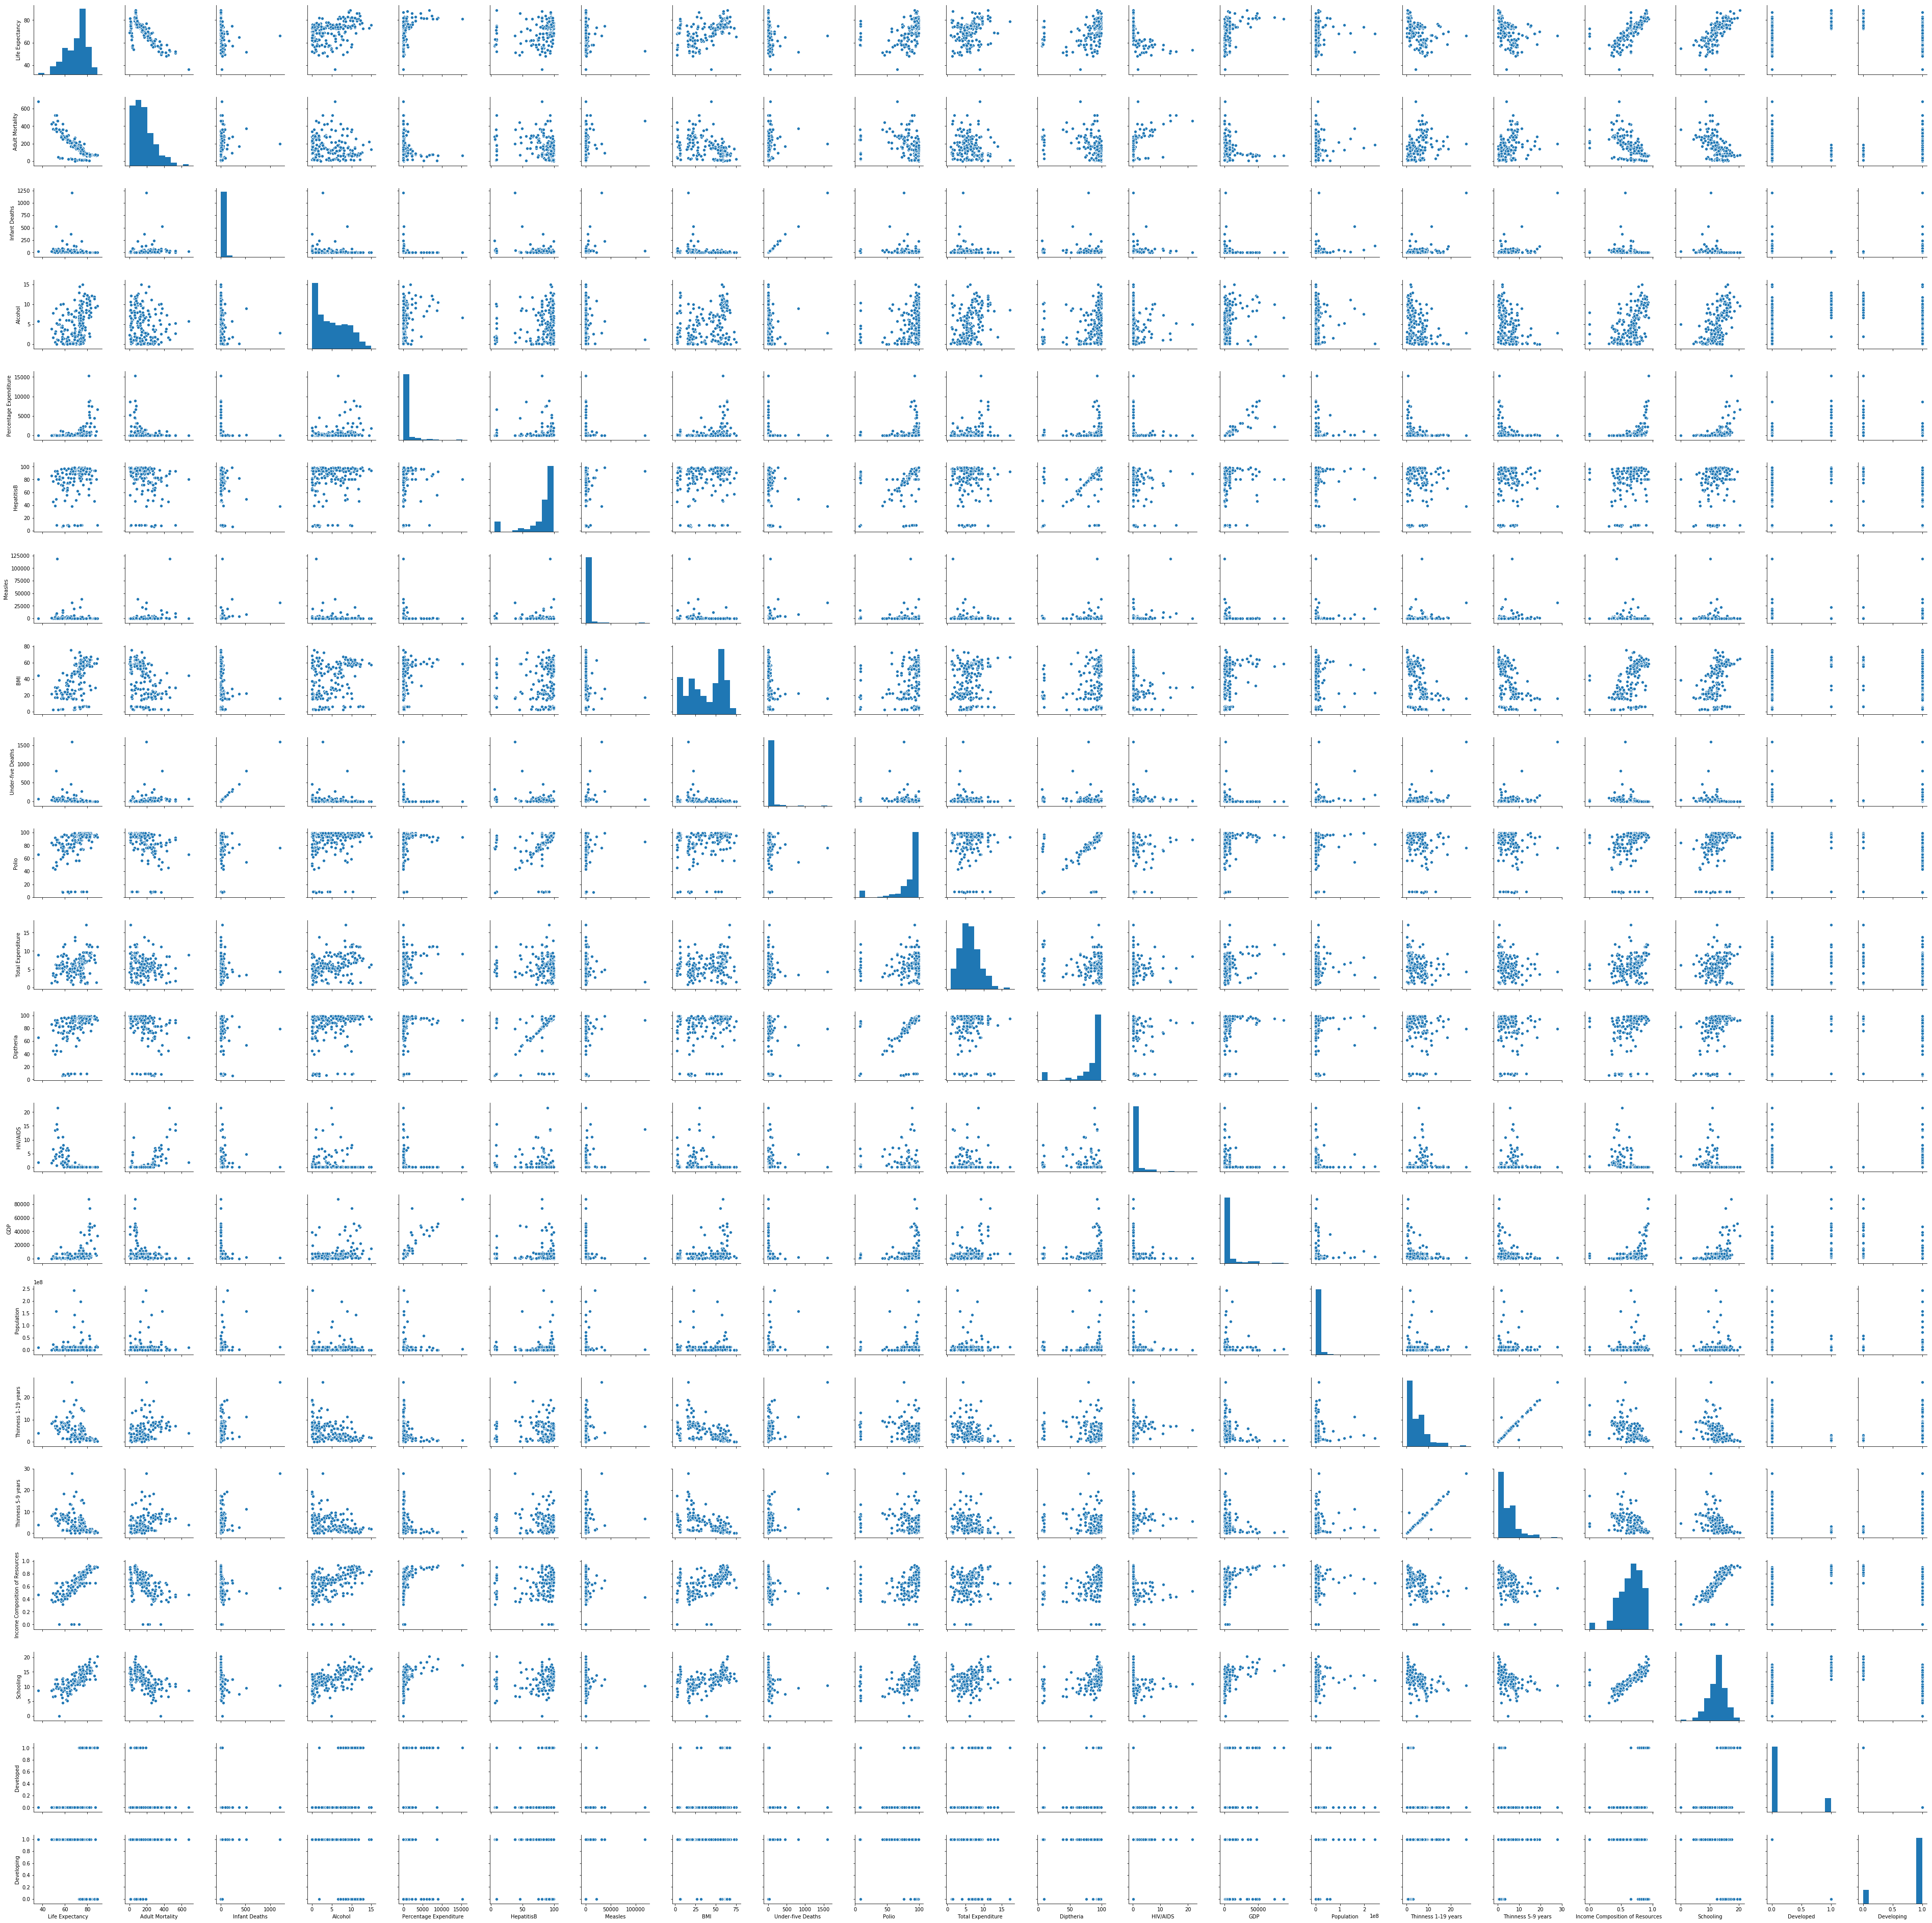

In [99]:
sns.pairplot(li)

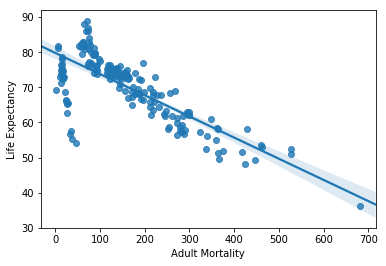

In [100]:
sns.regplot(y="Life Expectancy", x="Adult Mortality", data=li, fit_reg = True)

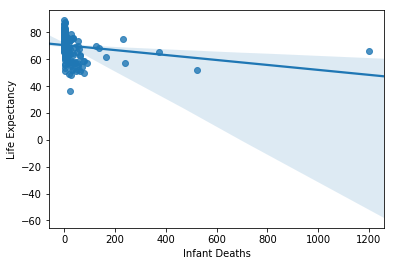

In [101]:
sns.regplot(y="Life Expectancy", x="Infant Deaths", data=li, fit_reg = True)

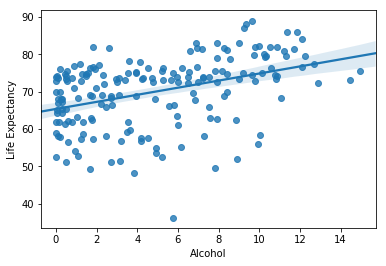

In [102]:
sns.regplot(y="Life Expectancy", x="Alcohol", data=li, fit_reg = True)

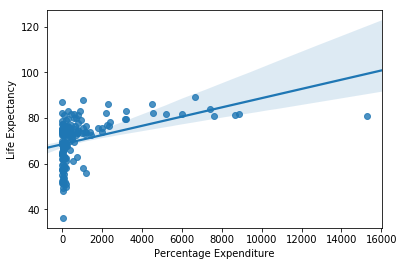

In [103]:
sns.regplot(y="Life Expectancy", x="Percentage Expenditure", data=li, fit_reg = True)

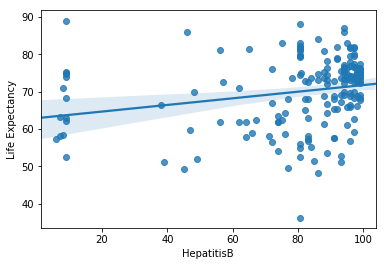

In [104]:
sns.regplot(y="Life Expectancy", x="HepatitisB", data=li, fit_reg = True)

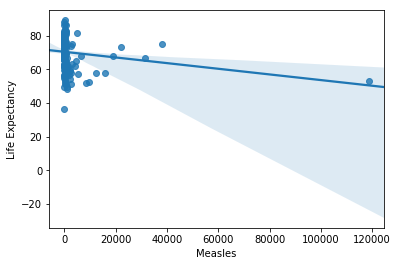

In [105]:
sns.regplot(y="Life Expectancy", x="Measles", data=li, fit_reg = True)

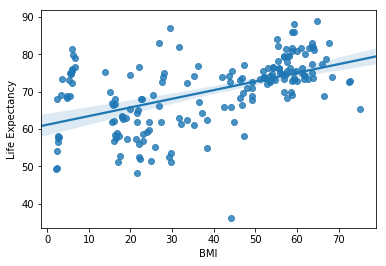

In [106]:
sns.regplot(y="Life Expectancy", x="BMI", data=li, fit_reg = True)

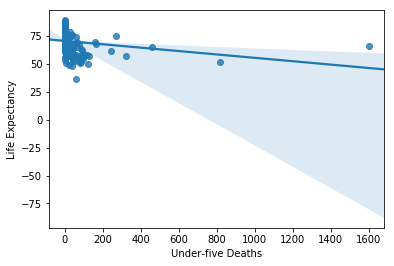

In [107]:
sns.regplot(y="Life Expectancy", x="Under-five Deaths", data=li, fit_reg = True)

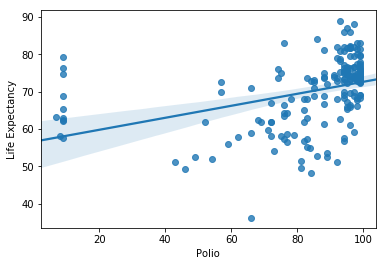

In [108]:
sns.regplot(y="Life Expectancy", x="Polio", data=li, fit_reg = True)

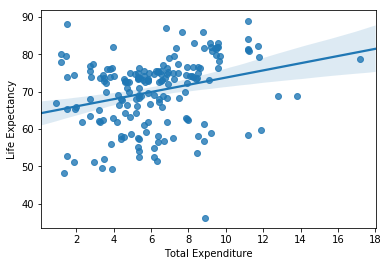

In [109]:
sns.regplot(y="Life Expectancy", x="Total Expenditure", data=li, fit_reg = True)

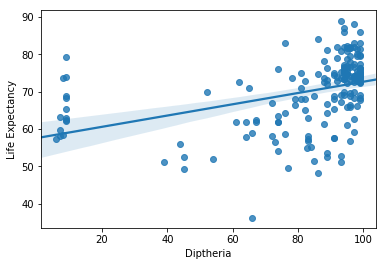

In [110]:
sns.regplot(y="Life Expectancy", x="Diptheria", data=li, fit_reg = True)

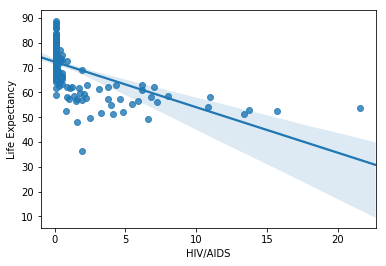

In [111]:
sns.regplot(y="Life Expectancy", x="HIV/AIDS", data=li, fit_reg = True)

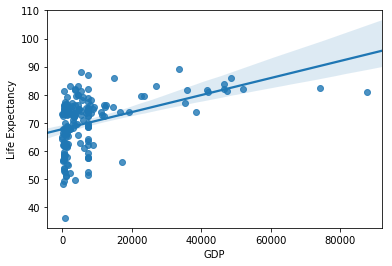

In [112]:
sns.regplot(y="Life Expectancy", x="GDP", data=li, fit_reg = True)

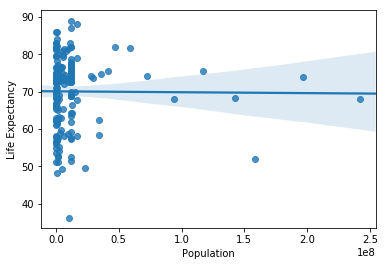

In [113]:
sns.regplot(y="Life Expectancy", x="Population", data=li, fit_reg = True)

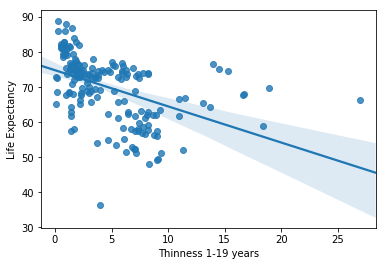

In [114]:
sns.regplot(y="Life Expectancy", x="Thinness 1-19 years", data=li, fit_reg = True)

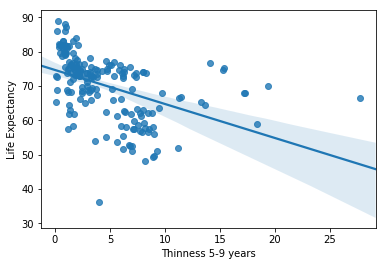

In [115]:
sns.regplot(y="Life Expectancy", x="Thinness 5-9 years", data=li, fit_reg = True)

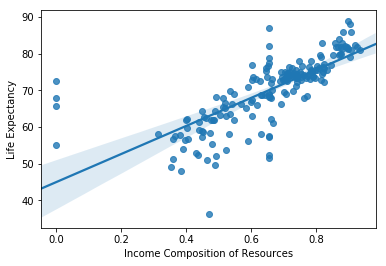

In [116]:
sns.regplot(y="Life Expectancy", x="Income Composition of Resources", data=li, fit_reg = True)

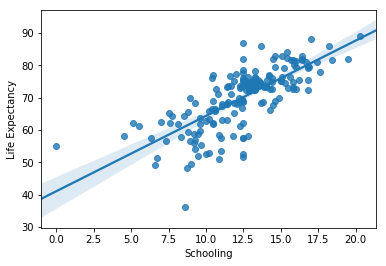

In [117]:
sns.regplot(y="Life Expectancy", x="Schooling", data=li, fit_reg = True)

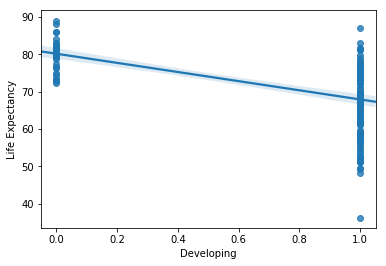

In [118]:
sns.regplot(y="Life Expectancy", x="Developing", data=li, fit_reg = True)

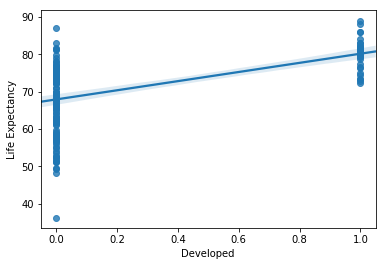

In [119]:
sns.regplot(y="Life Expectancy", x="Developed", data=li, fit_reg = True)

# Pairwise Interaction

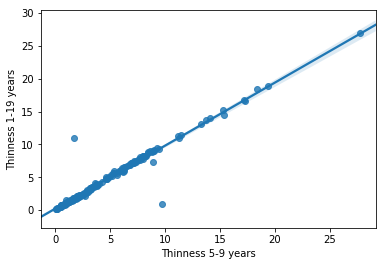

In [120]:
sns.regplot(y="Thinness 1-19 years", x="Thinness 5-9 years", data=li, fit_reg = True)

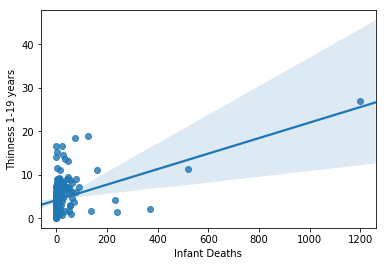

In [121]:
sns.regplot(y="Thinness 1-19 years", x="Infant Deaths", data=li, fit_reg = True)

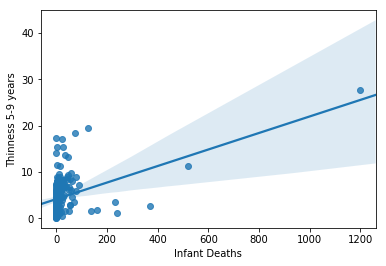

In [122]:
sns.regplot(y="Thinness 5-9 years", x="Infant Deaths", data=li, fit_reg = True)

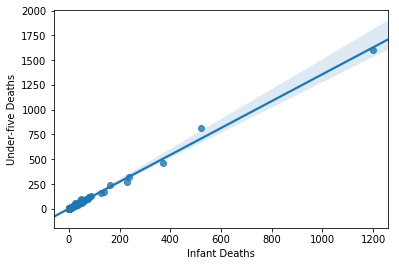

In [123]:
sns.regplot(y="Under-five Deaths", x="Infant Deaths", data=li, fit_reg = True)

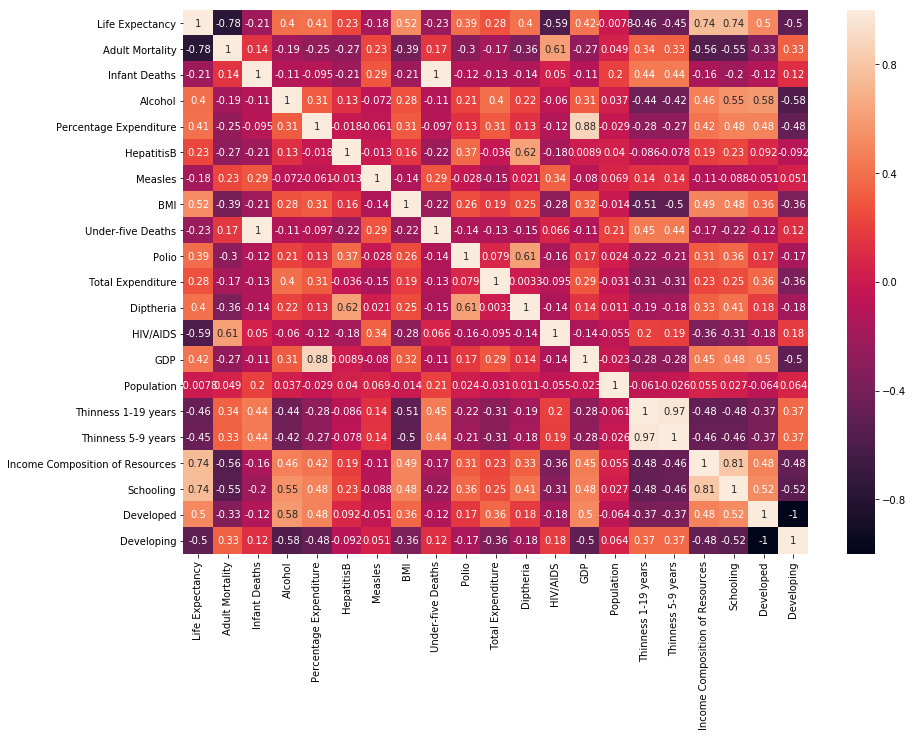

In [124]:
plt.figure(figsize = (14, 10))
sns.heatmap(li.corr(), annot = True)

# Feature Scaling

In [125]:
target_train=li['Life Expectancy']
features_train=li.drop('Life Expectancy',axis=1)

In [126]:
min_max_scaler=MinMaxScaler()
life_exp=min_max_scaler.fit_transform(features_train)
life_exp

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[4.07352941e-01, 6.16666667e-02, 0.00000000e+00, ...,
        4.53201970e-01, 0.00000000e+00, 1.00000000e+00],
       [1.30882353e-01, 8.33333333e-04, 3.52272727e-01, ...,
        6.15763547e-01, 0.00000000e+00, 1.00000000e+00],
       [1.72058824e-01, 1.75000000e-02, 2.94117647e-02, ...,
        6.69950739e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.39705882e-01, 2.91666667e-02, 3.34224599e-03, ...,
        4.18719212e-01, 0.00000000e+00, 1.00000000e+00],
       [5.30882353e-01, 2.50000000e-02, 1.64438503e-01, ...,
        5.81280788e-01, 0.00000000e+00, 1.00000000e+00],
       [7.72058824e-01, 2.41666667e-02, 3.47593583e-01, ...,
        4.92610837e-01, 0.00000000e+00, 1.00000000e+00]])

<function matplotlib.pyplot.show(*args, **kw)>

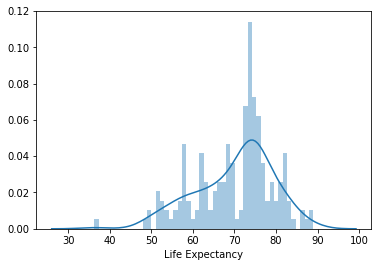

In [127]:
sns.distplot(li['Life Expectancy'],bins=50)
plt.show

In [128]:
names=list(li.columns)
names


['Life Expectancy',
 'Adult Mortality',
 'Infant Deaths',
 'Alcohol',
 'Percentage Expenditure',
 'HepatitisB',
 'Measles',
 'BMI',
 'Under-five Deaths',
 'Polio',
 'Total Expenditure',
 'Diptheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness 1-19 years',
 'Thinness 5-9 years',
 'Income Composition of Resources',
 'Schooling',
 'Developed',
 'Developing']

# Handling Multicollinearity

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
vif=pd.DataFrame()
vif["variables"] = features_train.columns
vif["VIF Factor"] = [variance_inflation_factor(features_train.values, i) for i in range(features_train.shape[1])]
vif

,variables,VIF Factor
0,Adult Mortality,2.389642
1,Infant Deaths,211.405967
2,Alcohol,2.171210
3,Percentage Expenditure,4.662710
4,HepatitisB,1.815609
5,Measles,1.326860
6,BMI,1.612289
7,Under-five Deaths,214.287955
8,Polio,1.691732
9,Total Expenditure,1.338361


# PCA on Dropped Variables

In [149]:
from sklearn.preprocessing import StandardScaler
features1 = ['Adult Mortality','Alcohol','Percentage Expenditure','HepatitisB','Measles','BMI','Polio','Total Expenditure','Diptheria','HIV/AIDS','GDP', 'Population','Income Composition of Resources','Schooling','Developed','Developing']

xm = li.loc[:, features1].values
ym = li.loc[:,['Life Expectancy']].values



xpm = StandardScaler().fit_transform(xm)
xpm

array([[ 0.97527657, -1.27551116, -0.36972935, ..., -1.0995568 ,
        -0.46034827,  0.46034827],
       [-0.59000684,  0.08696409, -0.39005738, ...,  0.01800948,
        -0.46034827,  0.46034827],
       [-0.35687952, -1.16175611, -0.18123086, ...,  0.39053157,
        -0.46034827,  0.46034827],
       ...,
       [ 0.59228169, -1.26258445, -0.41251512, ..., -1.33661631,
        -0.46034827,  0.46034827],
       [ 1.67465851, -0.63951702, -0.31351591, ..., -0.21905004,
        -0.46034827,  0.46034827],
       [ 3.0401185 ,  0.06886669, -0.38388978, ..., -0.82863164,
        -0.46034827,  0.46034827]])

In [150]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=16)
principalComponents1 = pca1.fit_transform(xpm)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['PC 1', 'PC 2','PC 3', 'PC 4','PC 5', 'PC 6','PC 7', 'PC 8','PC 9', 'PC 10','PC 11','PC 12','PC 13', 'PC 14','PC 15','PC 16'])
principalDf1

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16
0,-2.313500,0.896202,-0.698088,-0.387446,-0.342260,-0.742322,0.488864,1.126146,-0.469193,-0.076304,0.069284,0.492858,-0.750294,0.174650,-0.029987,1.091271e-16
1,0.338854,-1.701377,-0.238178,-0.227416,-0.325278,0.152280,-0.552374,-0.134386,-0.239978,0.142542,-0.214849,-0.068604,0.179619,-0.252790,-0.185747,6.593433e-16
2,0.078691,-1.596547,-0.433266,0.834209,0.449378,0.048021,-0.113331,-0.183169,-0.616835,0.017407,0.572973,0.347491,-0.147028,0.258418,-0.029725,3.374032e-16
3,-2.263869,0.434366,0.974085,-0.237577,0.301588,-0.682918,0.848172,-0.771941,1.085553,-0.301898,-1.039269,0.043597,-0.145879,-0.357325,-0.064887,-1.215648e-16
4,1.147098,-0.989325,0.130105,0.599101,-0.080222,-0.440817,-0.446118,-0.191512,0.536941,0.339371,-0.664668,0.043675,0.104610,-0.156396,-0.246252,6.234542e-18
5,1.216156,-1.387586,-0.125713,-0.031087,1.336863,-0.133009,-1.224874,-0.272436,0.147280,0.451569,-0.231920,0.033986,-0.015873,0.515192,-0.019641,-2.811165e-16
6,0.042168,-1.400785,-0.271639,0.121058,-0.316559,0.243713,-0.368357,-0.337742,-0.176386,0.044715,-0.221521,0.139847,0.050360,-0.247414,-0.111517,-1.212523e-17
7,6.427653,2.464086,0.503229,2.028789,-1.007871,-0.505844,0.592955,-0.146923,0.188983,0.647075,-0.322953,0.094916,0.108852,0.616475,-0.529196,-2.309511e-16
8,5.477989,2.861389,0.405326,0.931219,-0.784316,-0.956700,0.797033,0.352880,-0.117047,0.511206,-0.512643,-0.149828,0.233719,-0.284399,-0.417526,2.469780e-16
9,-0.458789,0.435332,-1.796573,0.683235,-0.119859,0.933303,-1.317658,0.326050,0.037860,-1.796320,0.598105,-1.165092,-0.487070,-0.593465,0.098963,-2.464232e-17


In [151]:
from sklearn.model_selection import train_test_split

In [152]:
xm_train,xm_test,ym_train,ym_test=train_test_split(xpm,ym,train_size = 0.80,test_size=0.2,random_state=0)

In [153]:
linregm=LinearRegression()
linregm.fit(xm_train,ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
print('linear model coeff (w): {}'
     .format(linregm.coef_))
#print('linear model intercept (b): {:.3f}'
   #  .format(linregm.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linregm.score(xm_train,ym_train)))

linear model coeff (w): [[-4.15158475  0.01588288  0.07796896 -0.70697545  0.55163774  0.2304111
   0.66242105  0.29262917  0.06025506 -1.46013712 -0.01800832  0.11031787
   1.78694999  2.17729609  0.45623427 -0.45623427]]
R-squared score (training): 0.851


In [155]:
linregtest1=LinearRegression()
linregtest1.fit(xm_test,ym_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
print('linear model coeff (w): {}'
     .format(linregtest1.coef_))
#print('linear model intercept (b): {:.3f}'
    # .format(linregtest1.intercept_))
print('R-squared score (testing): {:.3f}'
     .format(linregtest1.score(xm_test,ym_test)))

linear model coeff (w): [[ 0.36853632  1.71179474  1.07858534 -1.7557406  -0.10242509  2.14723541
   1.77219379  0.40099511  3.53183723 -2.45870726  0.6207605  -1.21686194
   0.2541841   2.53034278 -0.8237751   0.8237751 ]]
R-squared score (testing): 0.834


# Linear Regression

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_train,x_test,y_train,y_test=train_test_split(life_exp,target_train,train_size = 0.80,test_size=0.2,random_state=0)

In [138]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [139]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(x_train,y_train)))

linear model coeff (w): [-1.91004105e+01  4.73002616e+02  2.50446870e-01  2.37185616e+00
 -3.12071616e+00 -9.13888511e-01  4.01232955e-01 -5.17034119e+02
  1.34578988e+00  2.47143621e+00  6.04033585e-01 -1.23020874e+01
 -5.58818879e-01  3.54355749e-01 -1.47272676e+00  1.65095534e+00
  8.88289379e+00  9.79065261e+00  1.52415631e+00 -1.52415631e+00]
linear model intercept (b): 64.465
R-squared score (training): 0.878


In [140]:
y_actual=list(target_train)
y_actual

[58.8,
 76.2,
 74.7,
 49.6,
 75.6,
 75.5,
 73.5,
 81.9,
 84.0,
 71.1,
 75.0,
 76.1,
 69.9,
 74.7,
 73.0,
 80.0,
 69.5,
 58.7,
 67.9,
 68.7,
 76.4,
 61.1,
 73.8,
 76.9,
 73.4,
 57.5,
 56.8,
 51.5,
 72.5,
 66.6,
 55.3,
 81.2,
 49.2,
 51.2,
 79.1,
 75.0,
 73.6,
 61.8,
 62.0,
 78.1,
 76.6,
 78.0,
 79.5,
 77.5,
 69.0,
 57.4,
 79.2,
 61.3,
 72.7,
 75.0,
 70.0,
 72.0,
 56.1,
 62.1,
 75.6,
 61.8,
 69.1,
 79.9,
 81.3,
 62.3,
 59.3,
 73.8,
 81.0,
 69.0,
 83.0,
 72.6,
 77.0,
 57.8,
 56.7,
 65.9,
 36.3,
 73.6,
 74.5,
 81.8,
 66.4,
 68.1,
 74.1,
 76.0,
 86.0,
 81.7,
 81.8,
 75.0,
 83.0,
 73.4,
 67.8,
 63.0,
 65.3,
 74.0,
 68.8,
 63.6,
 72.8,
 74.9,
 51.1,
 59.7,
 72.8,
 72.4,
 86.0,
 63.3,
 52.9,
 74.1,
 76.7,
 56.5,
 83.0,
 62.0,
 73.3,
 75.6,
 68.7,
 66.3,
 75.3,
 72.8,
 54.0,
 65.4,
 63.0,
 68.0,
 88.0,
 89.0,
 73.2,
 58.2,
 52.0,
 81.0,
 75.6,
 65.1,
 76.5,
 61.8,
 73.2,
 73.7,
 67.9,
 76.3,
 79.6,
 77.3,
 87.0,
 68.8,
 73.4,
 68.4,
 62.8,
 74.2,
 72.5,
 72.6,
 66.2,
 73.7,
 64.3,
 74.4,
 72.4,

In [141]:
y_pred=linreg.predict(x_test)
y_pred

array([73.07606148, 61.67318259, 49.48411735, 45.6897424 , 64.09325124,
       53.62661013, 84.253846  , 72.10236507, 72.05351794, 24.81447372,
       75.99201811, 62.66495054, 72.90009729, 73.32866327, 72.74866458,
       48.2781126 ,  0.82767822, 70.96215738, 83.43958799, 47.94150904,
       70.04713688, 47.65155953, 65.94590611, 78.01908777, 73.54983077,
       68.40452894, 81.3876873 , 64.43716249, 58.47003746, 65.86559777,
       59.08552473, 61.1893605 , 67.25034513, 61.298061  , 74.74329696,
       69.26229536, 81.5581352 ])

In [142]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

146.83699531563707

In [143]:
rmse=np.sqrt(mse)
print("The root mean square score is:",rmse)

The root mean square score is: 12.117631588542254


In [144]:
linregtest=LinearRegression()
linregtest.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
linreg_test=linregtest.fit(x_test,y_test)
linreg_test

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
print('linear model coeff (w): {}'
     .format(linreg_test.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg_test.intercept_))
print('R-squared score (testing): {:.3f}'
     .format(linreg_test.score(x_test,y_test)))

linear model coeff (w): [   3.93263718  111.42969988    5.68814581    5.46830666  -65.73594295
   -2.3712329     4.41454165 -132.99302441    3.91298181   -0.57483924
   72.69231503  -17.61693804    9.08019455   11.15110339   19.71148627
  -27.53350138   -1.16401559   20.07209716   -2.25793477    2.25793477]
linear model intercept (b): 43.520
R-squared score (testing): 0.854


In [147]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
clf1= linear_model.LinearRegression()
X = x_train
Y = y_train
cv_scores = cross_val_score(clf1, X, Y,cv=3)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.70944513 0.76421096 0.85663407]
Mean cross-validation score (3-fold): 0.777


In [ ]:
model = linear_model.LinearRegression()
parameters = {'fit_intercept':[True], 'normalize':[True], 'copy_X':[True]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(x_train, y_train)
print ("r2 / variance :", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(x_test) - y_test) ** 2))

# Dropping Multicollinear variables

In [ ]:
check=features_train.drop(columns=['Thinness 1-19 years','Thinness 5-9 years','Infant Deaths','Under-five Deaths'],axis=1)
check

In [ ]:
min_max_scaler=MinMaxScaler()
chk=min_max_scaler.fit_transform(check)
chk

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
T_train,T_test,U_train,U_test=train_test_split(chk,target_train,train_size = 0.80,test_size=0.2,random_state=0)

In [ ]:
linregc=LinearRegression()
linregc.fit(T_train,U_train)

In [ ]:
print('linear model coeff (w): {}'
     .format(linregc.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linregc.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linregc.score(T_train,U_train)))

# Polynomial Regression

In [132]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
degree=[1,2,3,4,5]
Rtrain_list=[]
Rtest_list=[]
poly_rmse1=[]
crossv=[]
for thisdegree in degree:
        poly = PolynomialFeatures(degree=thisdegree)
        X_F1_poly = poly.fit_transform(life_exp)
        A1_train,A1_test,B1_train,B1_test=train_test_split(X_F1_poly,target_train,train_size = 0.80,random_state=40)
        linregpoly = LinearRegression().fit(X_F1_poly, target_train)
        print(thisdegree)
        print('(poly deg ) linear model coeff (w):\n{}'
             .format(linregpoly.coef_))
        print('(poly deg ) linear model intercept (b): {:.3f}'
             .format(linregpoly.intercept_))
        Rtrain=print('(poly deg ) R-squared score (training): {:.3f}'
               .format(linregpoly.score(A1_train, B1_train)))
        
        Rtest=print('(poly deg ) R-squared score (test): {:.3f}\n'
              .format(linregpoly.score(A1_test, B1_test)))
     
        Rtrain=linregpoly.score(A1_train,B1_train)
        print(Rtrain)
        Rtrain_list.append(Rtrain)
        Rtest=linregpoly.score(A1_test, B1_test)
        Rtest_list.append(Rtest)
        
        poly_predict =linregpoly.predict(A1_test)
        poly_mse = mean_squared_error(B1_test, poly_predict)
        poly_rmse = np.sqrt(poly_mse)
        print(poly_rmse)
        poly_rmse1.append(poly_rmse)
        XP = A1_train
        YP = B1_train
        cv_scores = cross_val_score(linregpoly, XP, YP,cv=3)
        print('Cross-validation scores (3-fold):', cv_scores)
        print('Mean cross-validation score (3-fold): {:.3f}'
             .format(np.mean(cv_scores)))
        validated=np.mean(cv_scores)
        crossv.append(validated)

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


1
(poly deg ) linear model coeff (w):
[   0.          -18.09450293  148.0309653     1.82616611    3.06805765
   -2.83552984    4.59662314    2.40474813 -153.37149349    2.0269508
    2.36449702    1.86301531  -13.58853146   -0.65655778    1.6767543
    7.74800795   -6.22687233    8.68311309   11.27076265    0.91338633
   -0.91338633]
(poly deg ) linear model intercept (b): 58.843
(poly deg ) R-squared score (training): 0.840
(poly deg ) R-squared score (test): 0.753

0.8403756419217324
3.8943455162293485
Cross-validation scores (3-fold): [0.33716727 0.80849011 0.21781859]
Mean cross-validation score (3-fold): 0.454
2
(poly deg ) linear model coeff (w):
[ 8.66555499e+01 -6.00572496e+01  3.40084856e+03  2.15889936e+02
 -1.08432375e+03  2.92397060e+02  4.72803710e+02  4.32454524e+02
 -3.23071194e+03  2.31920220e+01 -1.01327813e+01  9.72481404e+02
 -1.43786751e+02  5.97899672e+02  7.00482536e+01  1.02546573e+02
  4.78387762e+01  1.70028643e+02  3.31240226e+02  3.75757660e+01
  5.47180802e+

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


4
(poly deg ) linear model coeff (w):
[-0.05019949  1.45419331 -3.21651705 ...  0.          0.
  0.22766391]
(poly deg ) linear model intercept (b): 63.448
(poly deg ) R-squared score (training): 1.000
(poly deg ) R-squared score (test): 1.000

1.0
1.96053706217987e-13
Cross-validation scores (3-fold): [-0.051266   -0.17326912 -1.40804042]
Mean cross-validation score (3-fold): -0.544


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


5
(poly deg ) linear model coeff (w):
[-0.08474126 -0.36906886 -1.77745728 ...  0.          0.
 -0.07446942]
(poly deg ) linear model intercept (b): 68.623
(poly deg ) R-squared score (training): 1.000
(poly deg ) R-squared score (test): 1.000

1.0
2.194925330725798e-13
Cross-validation scores (3-fold): [ 0.20710801  0.07848619 -1.1261369 ]
Mean cross-validation score (3-fold): -0.280


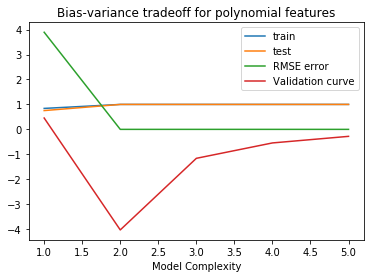

In [135]:
plt.plot(degree,Rtrain_list, label= 'train')
plt.plot(degree,Rtest_list, label= 'test')
plt.plot(degree,poly_rmse1, label= 'RMSE error')
plt.plot(degree,crossv,label='Validation curve')
plt.title("Bias-variance tradeoff for polynomial features")
plt.xlabel('Model Complexity')
plt.legend()
plt.show()

# Logistic Regression

In [ ]:
median = target_train.median() 
print("Median Life expectancy (in years) is=",median)

In [ ]:
a=[]
for rate in target_train:
    if rate>median:
        a.append(1) 
    else:
            a.append(0)
total1=np.array(a)
total1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
A_train,A_test,B_train,B_test=train_test_split(life_exp, total1 ,train_size = 0.80,random_state=0)

clf = LogisticRegression(solver='lbfgs').fit(life_exp,total1)
print('Accuracy of logisitc regression on training set: {:.2f}'
.format(clf.score(A_train,B_train)))
print('Accuracy of logisitc regression on test set: {:.2f}'
.format(clf.score(A_test,B_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
clf = LogisticRegression(solver='lbfgs').fit(A_train,B_train)
M = A_train
N = B_train
cv_scores = cross_val_score(clf, M, N,cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
C_train,C_test,D_train,D_test=train_test_split(life_exp, total1 ,train_size = 0.80,test_size=0.2,random_state=0)
clf = KNeighborsClassifier(n_neighbors = 5).fit(life_exp, total1)
print('Accuracy of KNN on training set: {:.2f}'
.format(clf.score(C_train,D_train)))
print('Accuracy of KNN on test set: {:.2f}'
.format(clf.score(C_test,D_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
c = C_train
d = D_train
cv_scores = cross_val_score(clf, c, d,cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
C1_train,C1_test,D1_train,D1_test=train_test_split(life_exp, total1 ,train_size = 0.80,test_size=0.2,random_state=0)
clf1 = KNeighborsClassifier(n_neighbors = 10).fit(life_exp, total1)
print('Accuracy of KNN on training set: {:.2f}'
.format(clf1.score(C1_train,D1_train)))
print('Accuracy of KNN on test set: {:.2f}'
.format(clf1.score(C1_test,D1_test)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
n_neighbor=[5,10,12,15,20]
knn_train_list=[]
knn_test_list=[]
knn_rmse_list=[]
C1_train,C1_test,D1_train,D1_test=train_test_split(life_exp, total1 ,train_size = 0.80,test_size=0.2,random_state=0)
for knn in n_neighbor:
        clfk = KNeighborsClassifier(n_neighbors = knn).fit(life_exp, total1)
        print('Accuracy of KNN on training set: {:.2f}'
             .format(clfk.score(C1_train,D1_train)))
        knn_train=clfk.score(C1_train,D1_train)
        print(knn_train)                 
        knn_train_list.append(knn_train)
       
        print('Accuracy of KNN on test set: {:.2f}'
             .format(clfk.score(C1_test,D1_test)))
        knn_test=clfk.score(C1_test,D1_test)
        print(knn_test)
        knn_test_list.append(knn_test)
        
        knn_predict =clfk.predict(C1_test)
        knn_mse = mean_squared_error(D1_test, knn_predict)
        knn_rmse = np.sqrt(knn_mse)
        print(knn_rmse)
        knn_rmse_list.append(knn_rmse)
        print('..............................................')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
n_neighbor=[5,10,12,15,20]
knn_cv_list=[]

for knn in n_neighbor:
        clfk1 = KNeighborsClassifier(n_neighbors = knn)
        c1 = C1_train
        d1 = D1_train
        cv_scores = cross_val_score(clfk1, c1, d1,cv=3)

        print('Cross-validation scores (3-fold) for:','neighbor=',knn, cv_scores)
        print('Mean cross-validation score (3-fold): {:.3f}'
             .format(np.mean(cv_scores)))
        knnscore=np.mean(cv_scores)
        knn_cv_list.append(knnscore)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n_neighbor,knn_train_list, label= 'train')
plt.plot(n_neighbor,knn_test_list, label= 'test')
plt.plot(n_neighbor,knn_cv_list, label= 'CVScore')
plt.plot(n_neighbor,knn_rmse_list, label= 'RMSE')
plt.title("Test-Train Accuracy of KNN")
plt.xlabel("n_neighbor")
plt.ylabel("R-square")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 20)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=3)

knn_gscv.fit(life_exp,total1)
par=knn_gscv.best_params_
scr=knn_gscv.best_score_
print(par)
print(scr)

# Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
alpha=[0,0.1,2,5,6,10,15,20,40,50]
E_train,E_test,F_train,F_test=train_test_split(life_exp, total1,train_size = 0.80,test_size=0.2,random_state=0)

for thisalpha in (0,0.1,2,5,6,10,15,20,40,50):
    clfn = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = thisalpha,
                   random_state = 0, solver='lbfgs').fit(E_train, F_train)

    print('Life Expectancy dataset')
    print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clfn.score(E_train, F_train)))
    print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clfn.score(E_test, F_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
clfnx = MLPClassifier(solver='lbfgs').fit(E_train,F_train)
e = E_train
f = F_train
cv_scores = cross_val_score(clfnx, e, f,cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

In [ ]:
alpha=[0,0.1,2,5,6,10,15,20,40,50]
E11_train,E11_test,F11_train,F11_test=train_test_split(life_exp, total1,train_size = 0.80,test_size=0.2,random_state=0)
train_score_list1=[]
test_score_list1=[]
nn_rmse_list=[]
for thisalpha in (0,0.1,2,5,6,10,15,20,40,50):
        clfn1 = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = thisalpha,
                   random_state = 0, solver='lbfgs').fit(E11_train, F11_train)
        print(thisalpha)
        train_score = clfn1.score(E11_train, F11_train)
        train_score_list1.append(train_score)
        test_score= clfn1.score(E11_test, F11_test)
        test_score_list1.append(test_score)
        print(train_score)
        print(test_score)
        nn_predict =clfn1.predict(E11_test)
        nn_mse = mean_squared_error(F11_test, nn_predict)
        nn_rmse = np.sqrt(nn_mse)
        print(nn_rmse)
        nn_rmse_list.append(nn_rmse)
       

In [ ]:
alpha=[0,0.1,2,5,6,10,15,20,40,50]
cv_nn_list=[]
from sklearn.model_selection import cross_val_score
for alp in alpha:
        clfnx1 = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = alp,
                   random_state = 0, solver='lbfgs').fit(E11_train, F11_train)

        en = E11_train
        fn = F11_train
        cv_scores = cross_val_score(clfnx1, en, fn,cv=3)
        print('Cross-validation scores (3-fold):', cv_scores)
        print('Mean cross-validation score (3-fold): {:.3f}'
             .format(np.mean(cv_scores)))
        cvn=np.mean(cv_scores)
        cv_nn_list.append(cvn)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(alpha,train_score_list1, label= 'train')
plt.plot(alpha,test_score_list1, label= 'test')
plt.plot(alpha,cv_nn_list, label= 'CV_NN')
plt.plot(alpha,nn_rmse_list, label= 'RMSE')
plt.title("Test-Train Accracy for Neural Network")
plt.legend()
plt.show()

# Shrinkage Models

# Ridge Models

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
G_train,G_test,H_train,H_test=train_test_split(life_exp, target_train ,train_size = 0.80,test_size=0.2,random_state=0)
#G_train_scaled = scaler.fit_transform(G_train)
#G_test_scaled = scaler.transform(G_test)
linridge = Ridge(alpha=0.5).fit(G_train, H_train)

print('Life Expectancy dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(G_train, H_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(G_test, H_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

In [ ]:
alpha1=[0, 0.5, 1, 10, 20, 50, 100, 1000]
print('Ridge regression: effect of alpha regularization parameter\n')
r2_train_list=[]
r2_test_list=[]
for this_alpha in [0, 0.5, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(G_train, H_train)
    r2_train = linridge.score(G_train, H_train)
    r2_train_list.append(r2_train)
    
    r2_test = linridge.score(G_test, H_test)
    r2_test_list.append(r2_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
clfr = linear_model.Ridge()
g = G_train
h = H_train
cv_scores = cross_val_score(clfr, g, h ,cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

In [ ]:
plt.plot(alpha1,r2_train_list, label= 'train')
plt.plot(alpha1,r2_test_list, label= 'test')
plt.legend()
plt.show()

# Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
I_train,I_test,J_train,J_test=train_test_split(life_exp, target_train ,train_size = 0.80,test_size=0.2,random_state=0)
linlasso = Lasso(alpha=0.5, max_iter = 1000).fit(I_train, J_train)

print('Life Expectancy dataset')
print('Lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('Lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(I_train, J_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(I_test, J_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(life_exp), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

In [ ]:
alpha2=[0.5, 1, 2, 3, 5, 10, 20, 50]
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')
r2_train_list1=[]
r2_test_list1=[]

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(I_train, J_train)
    r2_train1 = linlasso.score(I_train, J_train)
    r2_train_list1.append(r2_train1)
    r2_test1 = linlasso.score(I_test, J_test)
    r2_test_list1.append(r2_test1)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train1, r2_test1))

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
alpha2=[0.5, 1, 2, 3, 5, 10, 20, 50]
clfl = linear_model.Lasso()
i = I_train
j = J_train
cv_scores = cross_val_score(clfl, i, j ,cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

In [ ]:
plt.plot(alpha2,r2_train_list1, label= 'train')
plt.plot(alpha2,r2_test_list1, label= 'test')
plt.title("Accuracy for Lasso")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
grid_cv = GridSearchCV(Ridge(),
              param_grid={'alpha': range(-1, 10), 'max_iter' : [10, 100, 1000]},
               cv=3, refit=True)

grid_cv.fit(life_exp, target_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" %grid_cv.score(life_exp, target_train))

In [ ]:
grid_cv = GridSearchCV(Lasso(),
              param_grid={'alpha': range(0, 60), 'max_iter' : [10, 100, 1000]},
               cv=3, refit=True)

grid_cv.fit(life_exp, target_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" %grid_cv.score(life_exp, target_train))


# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Adult Mortality','Infant Deaths','Alcohol','Percentage Expenditure','HepatitisB','Measles','BMI','Under-five Deaths','Polio','Total Expenditure','Diptheria','HIV/AIDS','GDP', 'Population','Thinness 1-19 years','Thinness 5-9 years','Income Composition of Resources','Schooling','Developed','Developing']

xp = li.loc[:, features].values
yp = li.loc[:,['Life Expectancy']].values



xpp = StandardScaler().fit_transform(xp)
xpp

In [ ]:
df=pd.DataFrame(yp)
df

In [ ]:
xpp.shape

In [ ]:
from sklearn import decomposition
pca1=decomposition.PCA(n_components=20)
xpp_pca=pca1.fit_transform(xpp)
#To calculate how many components are explained by the transformation
ev=pca1.explained_variance_ratio_
cumsum_ev=pca1.explained_variance_ratio_.cumsum()
num_pc=np.where(cumsum_ev==cumsum_ev[cumsum_ev>=0.9][0])[0][0]+1
print('Number of principal components that explain 90% and above of the explained variance for the data=',num_pc)

In [ ]:
ev

In [ ]:
var=np.round(pca1.explained_variance_ratio_*100,decimals=2)
labels=['PC'+str(u) for u in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1),height=var,tick_label=labels)

plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal Components")
plt.title('Scree Plot')
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
var

In [ ]:
pca_df=pd.DataFrame(xpp,columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('PC1-{0}%'.format(var[0]))
plt.ylabel('PC2-{0}%'.format(var[1]))
for graph in pca_df.index:
           plt.annotate(graph,(pca_df.PC1.loc[graph],pca_df.PC2.loc[graph]))
plt.show()

In [ ]:
import numpy as np
mean_vec = np.mean(xpp, axis=0)
cov_mat = (xpp - mean_vec).T.dot((xpp - mean_vec)) / (xpp.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

In [ ]:
cov_mat = np.cov(xpp.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=num_pc)
principalComponents = pca.fit_transform(xpp)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2','PC 3', 'PC 4','PC 5', 'PC 6','PC 7', 'PC 8','PC 9', 'PC 10','PC 11'])
principalDf

In [ ]:
finalDf = pd.concat([principalDf, li[['Life Expectancy']]], axis = 1)
finalDf

# Lineraregression_PCA

In [ ]:
xpc_train,xpc_test,ypc_train,ypc_test=train_test_split(xpp,yp,train_size = 0.80,test_size=0.2,random_state=0)

In [ ]:
linregpca=LinearRegression()
linregpca.fit(xpc_train,ypc_train)

In [ ]:
print('linear model coeff (w): {}'
     .format(linregpca.coef_))
#print('linear model intercept (b): {:.3f}'
    # .format(linregpca.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linregpca.score(xpc_train,ypc_train)))

In [ ]:
linregpca=LinearRegression()
linregpca.fit(xpc_test,ypc_test)

In [ ]:
linregpca=LinearRegression()
linregpca.fit(xpc_train,ypc_train)

In [ ]:
print('linear model coeff (w): {}'
     .format(linregpca.coef_))
#print('linear model intercept (b): {:.3f}'
    # .format(linregpca.intercept_))
print('R-squared score (testing): {:.3f}'
     .format(linregpca.score(xpc_test,ypc_test)))

# KNN_PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Cp_train,Cp_test,Dp_train,Dp_test=train_test_split(xpp, total1 ,train_size = 0.80,test_size=0.2,random_state=0)
clfpca = KNeighborsClassifier(n_neighbors = 17).fit(xpp, total1)
print('Accuracy of KNN on training set: {:.2f}'
.format(clfpca.score(Cp_train,Dp_train)))
print('Accuracy of KNN on test set: {:.2f}'
.format(clfpca.score(Cp_test,Dp_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
clfpc1 = KNeighborsClassifier(n_neighbors = 17)
cp = Cp_train
dp = Dp_train
cv_scores = cross_val_score(clfpc1, cp, dp,cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

In [ ]:
from sklearn.neural_network import MLPClassifier

Enn_train,Enn_test,Fnn_train,Fnn_test=train_test_split(life_exp, total1,train_size = 0.80,test_size=0.2,random_state=0)

clfn_pca = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 10,
                   random_state = 0, solver='lbfgs').fit(Enn_train, Fnn_train)

print('Life Expectancy dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clfn_pca.score(Enn_train, Fnn_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clfn_pca.score(Enn_test, Fnn_test)))